<a href="https://colab.research.google.com/github/ThejaswiniNayak/Recommenders/blob/master/PlayStore_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the library used to query a website
import urllib2

In [0]:
#specify the url
wiki = "https://play.google.com/store/apps/details?id=com.playense.spiderswingman"

In [0]:
#Query the website and return the html to the variable 'page'
page = urllib2.urlopen(wiki)

In [0]:
#import the Beautiful soup functions to parse the data returned from the website
from bs4 import BeautifulSoup

In [0]:
#Parse the html in the 'page' variable, and store it in Beautiful Soup format
soup = BeautifulSoup(page)

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <base href="https://play.google.com/"/>
  <meta content="origin" name="referrer"/>
  <link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/>
  <link href="//www.gstatic.com/android/market_images/web/favicon_v2.ico" rel="shortcut icon"/>
  <script data-id="_gd" nonce="modYS1xWF3luI7qrslwqJw">
   window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*"],"FdrFJe":"-862520162936523067","GWsdKe":"en-US","Im6cmf":"_/PlayStoreUi","JxkZB":{"zr2HC":"f","VU2xMc":"f","XU68Tb":"f","Fho1U":"frt","KT5WVe":"f","bycBN":"f","HmJjYd":"m","WTZx5b":"f","EsJi4e":"f","d5UeYe":"f","k9J7nd":"f","y7hh2c":"f","CpVjr":"m","gk0cNb":"f","q4Rc2":"f","dnfTpd":"m","Duwph":"f","jLZZ2e":"f","n3ZQY":"f","fIAi0e":"f","a9gCkf":"f","ekQxif":"f","ing9tb":"f","wGXlYb":"f","xAkeid":"f","CNT7ob":"f","QuSeGc":"f","YzSZvf":"f","xdSrCf":"f","fmTUrf":"f","IoIWBc":"f","SLkEVb":"f","Wwv6He":"f","JGcz4":"f","MRTdke":"f","XZ4wqf"
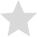
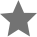
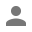
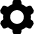
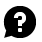
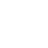
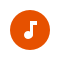
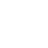
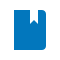
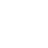
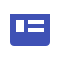
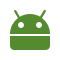
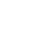
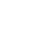
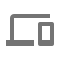
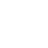
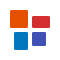
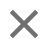
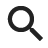
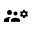
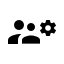
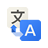
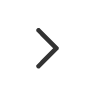
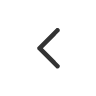
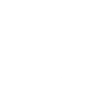
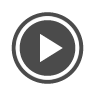
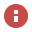
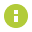
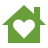
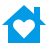
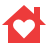
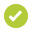
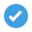
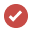
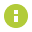
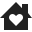
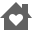

In [80]:
print soup.prettify()

In [96]:
name_box=soup.find('h1',attrs={"class":"AHFaub"}).find('span').text
print name_box

Swing Man


In [107]:
app_dev=soup.find('div',attrs={"class":"qQKdcc"}).find('span').find('a').text
print app_dev

Playense


In [117]:
app_cat=soup.find('a',attrs={"itemprop":"genre"}).text
print app_cat

Casual


In [133]:
app_desc=soup.find('div',attrs={"jsname":"sngebd"}).text
print app_desc

You will play as a super boy who has to swing with his web throughout the city. It is really fantastic to move across the city with his power. Become the most courageous and fearless swing man! To protect the city you have to look from the sky by swinging. So swing as much as you can with your rope!The more levels you complete the more coins you will be able to earn and customize your superhero.And if you do really well and able to finish every level, you will become an ultimate champion of the city!Swing Man Features:- Incredible super abilities- Fantastically enthralling gameplay- Check your super hero reflection with missile!- Collect coins and customize your spider boy!
